In [1]:
# import thư viện
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

1. Analyze and Preprocess data - Check if the dataset has missing values or has any other problem.
2. Feature Engineering
3. Divide the dataset into 2 training and test sets
4. Use logistic model Regression. Try to apply different *solver* and *penalty* to find the best one.
5. Perform model on training set and test set
6. Measure performance of the model.
7. Which metric is your main metric and why? Which solver and penalty have you chosen? (<= 100 words)


How can I measure your point:
1. Your function is callable and runs correctly
2. The performance of your model (in full pipeline) is acceptable. The final error based on my train and test set is low enough.
3. The data preprocessing is correct or make sense
4. The Feature engineering is correct or make sense
5. Any other additional process will be considered a small plus point.

- Age: This is the attribute that describes the age of the patient. There is data type $int64$, the highest value is 77, and the lowest is 29.
- Sex: This is the attribute indicating the gender of the patient, where 0 indicates male patient, 1 female patient.
- ChestPainType: This is the attribute that indicates the patient's chest pain level. With levels 0, 1, 2, and 3.
- RestingBP: This is the attribute that indicates the patient's blood pressure with data type $int64$, the value is in the range [94, 200]
- Cholesterol: This attribute indicates the patient's cholesterol level as measured in the hospital. Has the data type $int64$, where the value is in [126, 564]
- FastingBS: This is an attribute that describes the patient's fasting blood sugar. In which, if the patient has more than 120mg/dl sugar = 1, otherwise = 0.
- RestingECG: This property displays the results of the ECG from 0 to 2 (0, 1, 2). Where each value indicates the severity of the pain.
- thalach: Patient's highest heart rate
- ExerciseAngina: Whether or not you have angina during exercise. Yes denotes 1, no denotes 0.
- Oldpeak: Attribute expressing the stress level of the patient. Has a value of type $float64$, the value is in [0, 6.2]
- ST\_Slope: Patient's condition during exercise. Includes [Upsloping, Flat, Down sloping] states that are sequentially digitized to [0, 1, 2].
- ca: number of major vessels (0-3) colored by flourosopy - given
- thal: 0 = normal; 1 = fixed defect; 2 = reversable defect
- target: Results of the patient's condition. 1 is for signs of heart disease, 0 is for no signs of heart disease.

## Load Dataset

In [2]:
# import hàm thư viện và đọc dữ liệu
import pandas as pd
df = pd.read_csv("heart.csv")
#ToDo: Show histogram of dataframe

In [3]:
df.head() # trả về 5 cột dữ liệu đầu tiên của m

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0
1,71,0,1,160,302,0,1,162,0,0.4,2,2,2,1
2,71,0,1,160,303,0,1,163,0,0.4,2,2,2,1
3,71,0,1,160,304,0,1,164,0,0.4,2,2,2,1
4,71,0,1,160,305,0,1,165,0,0.4,2,2,2,1


In [4]:
df.info() #Print a concise summary of a DataFrame.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 886 entries, 0 to 885
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       886 non-null    int64  
 1   sex       886 non-null    int64  
 2   cp        886 non-null    int64  
 3   trestbps  886 non-null    int64  
 4   chol      886 non-null    int64  
 5   fbs       886 non-null    int64  
 6   restecg   886 non-null    int64  
 7   thalach   886 non-null    int64  
 8   exang     886 non-null    int64  
 9   oldpeak   886 non-null    float64
 10  slope     886 non-null    int64  
 11  ca        886 non-null    int64  
 12  thal      886 non-null    int64  
 13  target    886 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 97.0 KB


In [5]:
df.describe() #Generate descriptive statistics.

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000
mean,54.007901,0.683973,1.005643,132.117381,247.497743,0.168172,0.495485,149.492099,0.310384,1.083296,1.424379,0.714447,2.278781,0.564334
std,9.126292,0.465186,1.024542,16.807511,47.209995,0.374230,0.526669,23.921327,0.462912,1.147935,0.556861,1.028825,0.572576,0.496124
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.000000,0.000000,0.000000,120.000000,212.000000,0.000000,0.000000,133.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,54.000000,1.000000,1.000000,130.000000,245.000000,0.000000,0.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,60.000000,1.000000,2.000000,140.000000,274.000000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,206.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [6]:
df.describe(include=[object,float]) # generate descriptive statistics about object and float

,oldpeak
count,886.000000
mean,1.083296
std,1.147935
min,0.000000
25%,0.000000
50%,0.800000
75%,1.800000
max,6.200000


In [7]:
print("Continous Columns") # in ra các cột có biến liên tục
continous_columns = df.describe().columns
print(continous_columns)

Continous Columns
Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')


array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'sex'}>,
        <AxesSubplot:title={'center':'cp'}>,
        <AxesSubplot:title={'center':'trestbps'}>],
       [<AxesSubplot:title={'center':'chol'}>,
        <AxesSubplot:title={'center':'fbs'}>,
        <AxesSubplot:title={'center':'restecg'}>,
        <AxesSubplot:title={'center':'thalach'}>],
       [<AxesSubplot:title={'center':'exang'}>,
        <AxesSubplot:title={'center':'oldpeak'}>,
        <AxesSubplot:title={'center':'slope'}>,
        <AxesSubplot:title={'center':'ca'}>],
       [<AxesSubplot:title={'center':'thal'}>,
        <AxesSubplot:title={'center':'target'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

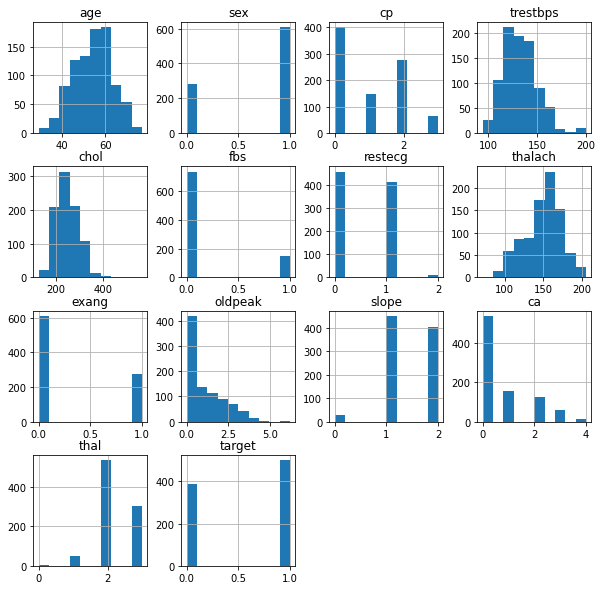

In [8]:
df.hist(column=continous_columns, figsize=(10, 10)) # vẽ histogram cho biến liên tục

### Nhận xét:
- Nhìn hình trực quan hóa cột "age" và "sex" ta có thể thấy được rằng hầu hết những người có nguy cơ mắc bệnh tim là những người có độ tuổi khoảng từ 50 đến 60 là chủ yếu và bệnh nhân là nữ chiếm hầu hết trong tổng số bệnh nhân.
- Ngoài ra ta cũng có thể thấy được các yếu tố dẫn đến bệnh tim là khi đó các chỉ số như cholesterol, thalach, trestbqs, với trestbqs trung bình là 125, cholesterol là 60 và thalach là 160

<AxesSubplot:xlabel='trestbps', ylabel='Count'>

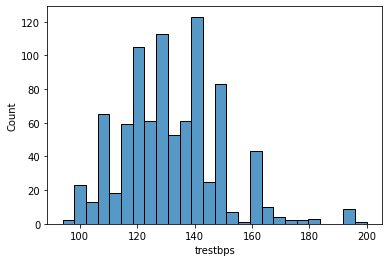

In [9]:
import seaborn as sns
sns.histplot(x="trestbps", data=df)# vẼ histplot của trestbps

<AxesSubplot:xlabel='age', ylabel='Count'>

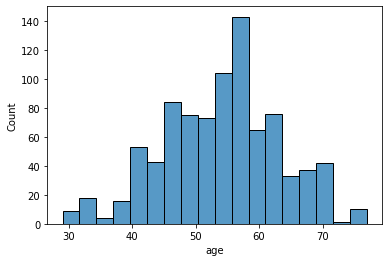

In [10]:
sns.histplot(x="age",data = df)# vẽ hisplot trực quan cột age

## Nhận xét:
- Nhìn chung, thì khoảng 50 tuổi là độ tuổi dễ mắc bệnh tim mạch nhất

## Data Analysis & Preprocessing

Các bước data analysis:
1. df.describe() : trả về các thông tin tổng quan về các cột đại diện cho giá trị số như min, max, mean, median,std
2. Kiểm tra dữ liệu null (df.isnull().sum())
3. Kiểm tra các giá trị trùng lặp (df.duplicated().sum())
4. Sắp xếp giá trị các cột
5. Tính giá trị trung bình một cột
6. Thống kê một cột theo giá trị duy nhất
7. trực quan hóa dữ liệu
8. gom nhóm dữ liệu
9. so sánh giá trị hai cột

In [11]:
df.describe() #Generate descriptive statistics.

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000
mean,54.007901,0.683973,1.005643,132.117381,247.497743,0.168172,0.495485,149.492099,0.310384,1.083296,1.424379,0.714447,2.278781,0.564334
std,9.126292,0.465186,1.024542,16.807511,47.209995,0.374230,0.526669,23.921327,0.462912,1.147935,0.556861,1.028825,0.572576,0.496124
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.000000,0.000000,0.000000,120.000000,212.000000,0.000000,0.000000,133.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,54.000000,1.000000,1.000000,130.000000,245.000000,0.000000,0.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,60.000000,1.000000,2.000000,140.000000,274.000000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,206.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


<AxesSubplot:xlabel='count', ylabel='restecg'>

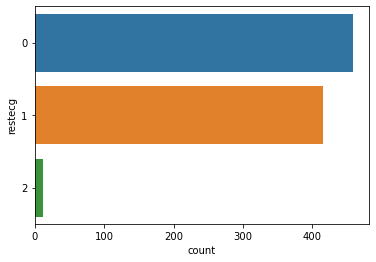

In [12]:
sns.countplot(y="restecg", data=df)

In [13]:
df.isnull().sum() # returns the number of missing values in the dataset

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [14]:
df.duplicated().sum() # Return sum boolean Series denoting duplicate rows.

0

In [15]:
df.sort_values('age',ascending = True) # sắp xếp dữ liệu cột age

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
71,29,1,1,130,201,0,0,199,0,0.0,2,0,2,1
64,29,1,1,130,204,0,0,202,0,0.0,2,0,2,1
65,29,1,1,130,205,0,0,203,0,0.0,2,0,2,1
66,29,1,1,130,206,0,0,204,0,0.0,2,0,2,1
72,29,1,1,130,200,0,0,198,0,0.0,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
286,76,0,2,140,195,0,2,114,0,1.1,1,0,2,1
288,76,0,2,140,193,0,2,112,0,1.1,1,0,2,1
281,76,0,2,140,198,0,2,117,0,1.1,1,0,2,1
287,76,0,2,140,194,0,2,113,0,1.1,1,0,2,1


In [16]:
df['restecg'].mean() # Return the mean of the values"restecg".

0.49548532731376976

In [17]:
df['age'].mean() # return the mean of the values"age"

54.0079006772009

In [18]:
df['target'].value_counts() # count the values of target

1    500
0    386
Name: target, dtype: int64

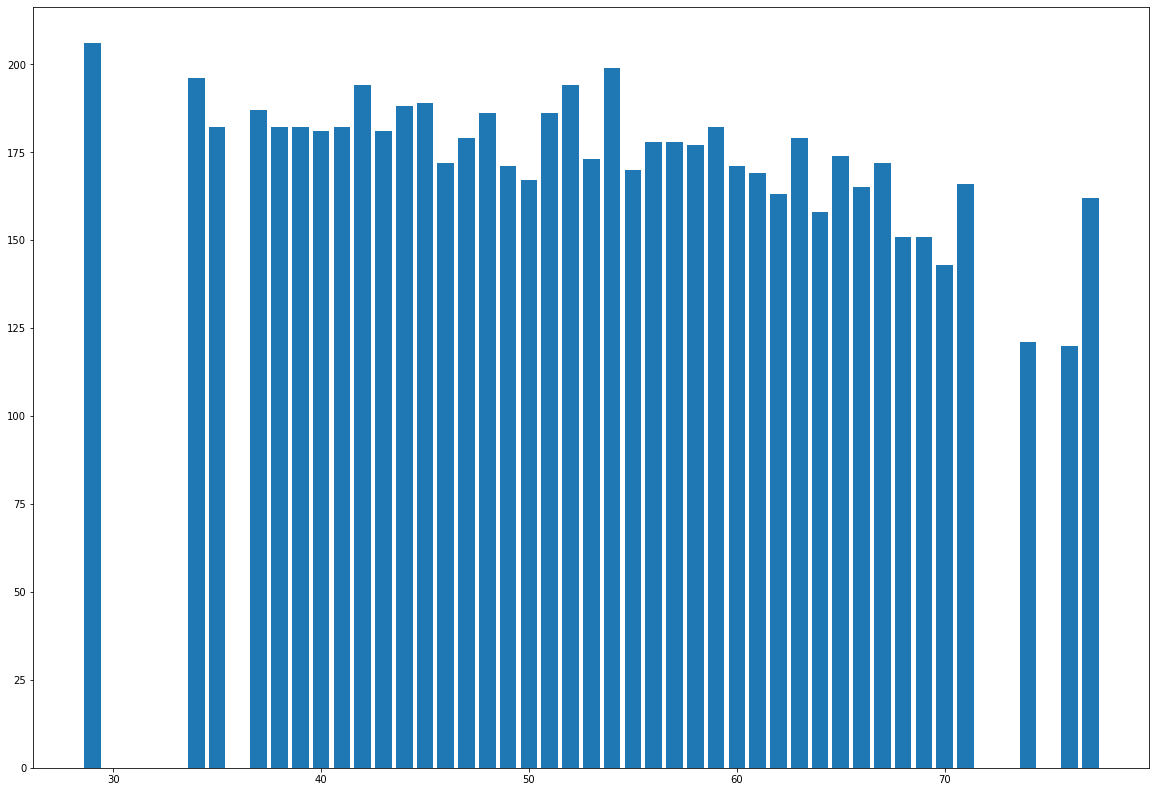

In [19]:
# Figure Size
fig = plt.figure(figsize =(20, 14))
 
# Horizontal Bar Plot
plt.bar(x = df['age'], height = df['thalach'])
 
# Show Plot
plt.show()

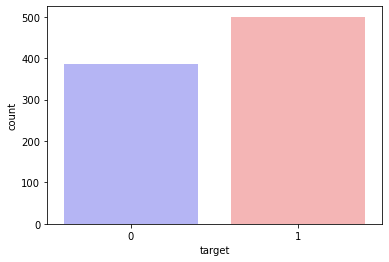

In [20]:
sns.countplot(x="target", data=df, palette="bwr") # trực quan hóa các biến của cột "target"
plt.show()

### Nhận xét:
- Hầu hết những bệnh nhân trong các data sample này đều có nguy cơ mắc bệnh tim cao

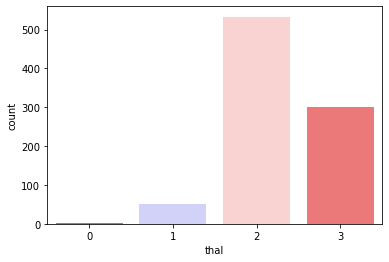

In [21]:
sns.countplot(x="thal", data=df, palette="bwr") # trực quan hóa các biến của cột "thal"
plt.show()

<AxesSubplot:>

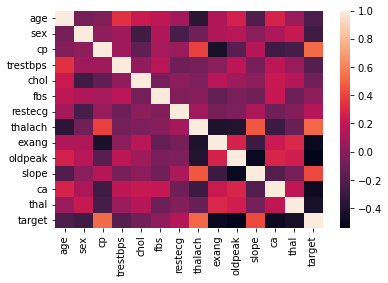

In [22]:
sns.heatmap(df.corr()) # vẽ heatmap

## Feature Engineering

In [23]:
# Normalized data
norm_df = df.copy()
norm_df = (df - df.mean()) / df.std()
norm_df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,-0.877454,0.679356,-0.981554,-0.720950,0.031821,-0.44938,-0.940790,-0.229590,-0.670503,-0.246787,1.033688,-0.694430,1.259604,-1.137486
1,1.861884,-1.470321,-0.005508,1.658938,1.154464,-0.44938,0.957934,0.522877,-0.670503,-0.595239,1.033688,1.249536,-0.486889,0.878139
2,1.861884,-1.470321,-0.005508,1.658938,1.175646,-0.44938,0.957934,0.564680,-0.670503,-0.595239,1.033688,1.249536,-0.486889,0.878139
3,1.861884,-1.470321,-0.005508,1.658938,1.196828,-0.44938,0.957934,0.606484,-0.670503,-0.595239,1.033688,1.249536,-0.486889,0.878139
4,1.861884,-1.470321,-0.005508,1.658938,1.218010,-0.44938,0.957934,0.648288,-0.670503,-0.595239,1.033688,1.249536,-0.486889,0.878139
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
881,1.533164,-1.470321,0.970538,-0.720950,-0.773094,-0.44938,-0.940790,-1.441897,-0.670503,0.363003,-0.762092,-0.694430,-0.486889,0.878139
882,-1.096601,-1.470321,0.970538,-1.434917,-2.255830,-0.44938,0.957934,1.066325,-0.670503,-0.421013,-0.762092,-0.694430,-0.486889,0.878139
883,-0.220013,0.679356,-0.981554,-0.244973,0.158912,-0.44938,0.957934,0.481073,1.489735,-0.943691,1.033688,0.277553,1.259604,-1.137486
884,0.547002,0.679356,1.946584,1.658938,0.540188,-0.44938,-0.940790,-1.023860,-0.670503,-0.943691,1.033688,-0.694430,-0.486889,-1.137486


In [24]:
norm_df.corr() # correlation of norm_df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.078459,-0.038434,0.337231,0.222152,0.187199,0.086401,-0.364585,0.125929,0.260906,-0.219664,0.271855,0.049096,-0.232576
sex,-0.078459,1.000000,0.013230,0.064870,-0.280802,0.123895,-0.241043,-0.096892,0.130696,0.152399,-0.009482,0.120516,0.212362,-0.283901
cp,-0.038434,0.013230,1.000000,0.063611,-0.157302,0.094775,0.047164,0.381308,-0.434926,-0.181597,0.142356,-0.283616,-0.253087,0.520575
trestbps,0.337231,0.064870,0.063611,1.000000,0.022509,0.157461,-0.106654,-0.082958,-0.006576,0.169383,-0.067141,0.176673,0.053659,-0.194818
chol,0.222152,-0.280802,-0.157302,0.022509,1.000000,-0.079892,0.006748,-0.050853,0.157342,0.061578,-0.001511,0.213909,0.151240,-0.093199
fbs,0.187199,0.123895,0.094775,0.157461,-0.079892,1.000000,-0.039141,-0.021372,-0.145109,-0.059736,-0.093437,0.204107,-0.113579,0.017736
restecg,0.086401,-0.241043,0.047164,-0.106654,0.006748,-0.039141,1.000000,0.088967,-0.079988,-0.050961,0.114417,-0.109777,-0.035165,0.143819
thalach,-0.364585,-0.096892,0.381308,-0.082958,-0.050853,-0.021372,0.088967,1.000000,-0.420237,-0.398322,0.463312,-0.298086,-0.128411,0.512224
exang,0.125929,0.130696,-0.434926,-0.006576,0.157342,-0.145109,-0.079988,-0.420237,1.000000,0.269824,-0.296775,0.219526,0.291320,-0.492947
oldpeak,0.260906,0.152399,-0.181597,0.169383,0.061578,-0.059736,-0.050961,-0.398322,0.269824,1.000000,-0.503280,0.287669,0.245363,-0.540943


<AxesSubplot:>

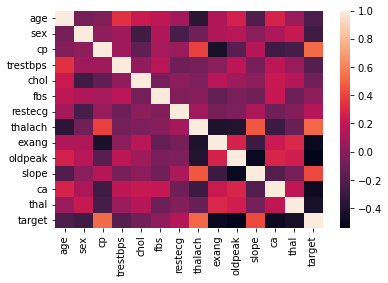

In [25]:
sns.heatmap(norm_df.corr()) # Show heatmap after normalized data

In [26]:
norm_df.head() # return 5 rowns of norm_df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,-0.877454,0.679356,-0.981554,-0.720950,0.031821,-0.44938,-0.940790,-0.229590,-0.670503,-0.246787,1.033688,-0.694430,1.259604,-1.137486
1,1.861884,-1.470321,-0.005508,1.658938,1.154464,-0.44938,0.957934,0.522877,-0.670503,-0.595239,1.033688,1.249536,-0.486889,0.878139
2,1.861884,-1.470321,-0.005508,1.658938,1.175646,-0.44938,0.957934,0.564680,-0.670503,-0.595239,1.033688,1.249536,-0.486889,0.878139
3,1.861884,-1.470321,-0.005508,1.658938,1.196828,-0.44938,0.957934,0.606484,-0.670503,-0.595239,1.033688,1.249536,-0.486889,0.878139
4,1.861884,-1.470321,-0.005508,1.658938,1.218010,-0.44938,0.957934,0.648288,-0.670503,-0.595239,1.033688,1.249536,-0.486889,0.878139


In [27]:
def prepare_X_y(df):
    """
    Feature engineering and create X and y
    :param df: pandas dataframe
    :return: (X, y) output feature matrix (dataframe), target (series)
    """
    # Todo: Split data into X and y (using sklearn train_test_split). Return two dataframes
    X = df.drop('target',axis = 1, inplace=False).values
    y = df['target']
    return X, y

In [31]:
X, y = prepare_X_y(df) # print the result

# Apply machine learning model

## Train-test split

In [32]:
# import the library
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state = 42)     # Split data into train and test with test = 30% and train = 70%

In [34]:
X_train.shape, X_test.shape # print shape of train and shape of test

((620, 13), (266, 13))

In [35]:
pd.DataFrame(X_train).head() # print 5 rows of X_train

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,49.0,0.0,1.0,134.0,268.0,0.0,1.0,159.0,0.0,0.0,1.0,0.0,2.0
1,38.0,1.0,3.0,120.0,231.0,0.0,1.0,182.0,1.0,3.8,1.0,0.0,3.0
2,44.0,0.0,2.0,118.0,238.0,0.0,1.0,145.0,0.0,0.3,1.0,1.0,2.0
3,59.0,1.0,3.0,134.0,204.0,0.0,1.0,162.0,0.0,0.8,2.0,2.0,2.0
4,54.0,1.0,2.0,120.0,258.0,0.0,0.0,147.0,0.0,0.4,1.0,0.0,3.0


In [37]:
def build_model(X, y):
    """
    Design your model and train it (including your best params)
    :param X: feature matrix
    :param y: target
    :return: a model
    """
    model = make_pipeline(StandardScaler(), LogisticRegression(random_state=42))
    # Todo: fit your model with X, y
    model.fit(X, y)
    return model


In [38]:
def calculate_performance(y_true,y_pred):
    print("Accuracy: ", accuracy_score(y_true, y_pred))
    print("Accuracy: ", accuracy_score(y_true, y_pred))
    print("F1 score: ", f1_score(y_true, y_pred))
    print("Precision: ", precision_score(y_true, y_pred))
    print("Recall: ", recall_score(y_true, y_pred))

    # Only choose one of them as your score for the question 7
    main_score = accuracy_score(y_true, y_pred)
    return main_score

model = build_model(X_train, y_train)

# Compare on training dataset
pred_train = model.predict(X_train)
print("Training performance:")
print(classification_report(y_train, pred_train))
print("Main score:", calculate_performance(y_train, pred_train))

# Compare on testing dataset
pred_test = model.predict(X_test)
print("Testing performance:")
print(classification_report(y_test, pred_test))
print("Main score:", calculate_performance(y_test, pred_test))

Training performance:
              precision    recall  f1-score   support

           0       0.95      0.93      0.94       272
           1       0.94      0.97      0.95       348

    accuracy                           0.95       620
   macro avg       0.95      0.95      0.95       620
weighted avg       0.95      0.95      0.95       620

Accuracy:  0.9483870967741935
Accuracy:  0.9483870967741935
F1 score:  0.9545454545454545
Precision:  0.9438202247191011
Recall:  0.9655172413793104
Main score: 0.9483870967741935
Testing performance:
              precision    recall  f1-score   support

           0       0.96      0.94      0.95       114
           1       0.95      0.97      0.96       152

    accuracy                           0.95       266
   macro avg       0.95      0.95      0.95       266
weighted avg       0.95      0.95      0.95       266

Accuracy:  0.9548872180451128
Accuracy:  0.9548872180451128
F1 score:  0.9607843137254902
Precision:  0.9545454545454546
Re

### Reporting:
- Nhìn chung, kết quả của tập training này có độ chính xác accuracy đạt 0,948 và độ chính xác của lớp 0 cũng là 0,95, recall cũng đặt tương đối cao là 0,966, độ chính xác của lớp 1 đạt 0,95 và recall đạt 0,97, F1 score cũng là 0,955. Từ những dữ kiện sau ta có thể thấy được kết quả tốt trên tập train của mô hình
- Hơn thế nữa, kết quả của tập test này có độ chính xác accuracy đạt 0,955 ; độ chính xác của lớp 0 là 0,96 và recall là 0,967, còn độ chính xác của lớp 1 đạt 0,954, recall đạt 0,967. F1 - score thì đạt được mức là 0,961. Kết quả này cho thấy mô hình chạy tốt trên tập nghiệm
- Từ hai kết quả trên ta có thể thấy được rằng mô hình có thể chạy tốt với Scikit- learn và với thuật toán logistic. Cả hai đều cho ra 1 kết quả là khoảng 95% trên cả hai tập test và tập train, việc dùng 1 trong 2 cái này đều có thể cho ra được kết quả dự đoán chính xác tương dối cao